<a href="https://colab.research.google.com/github/GwanMuk/AI_Study24/blob/master/%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 인공 신경망을 구성하는 절차
# 1. 더미데이터를 준비해야 한다
# 2. 훈련용, 검증용, 테스트용으로 나눈다
# 3. 심층을 만든다(dense)
# 4. model에 적용한다
# 5. compile 진행 (최적화 기법을 적용 : adam)
# 6. fit(훈련) 진행
# 7. evaluate (검증)

In [ ]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이
# 상세하게 출력되어 확인 할 수 있다. (에포크 횟수, 손실, 정확도)
# 아래쪽에 <keras.src.callbacks.history.History at 0x78683c2a4f70> 출력메세지가 나온다
# 코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력한다.

# 다시말해 fit()메서드는 History라는 클래스 객체를 반환했다, (훈련과정의 지표, 손실, 정확도 등이 들어있다)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다.

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism() # 케라스 버젼 오류 케어 함수

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
# 엔터효과 제거용 \ 긴문장을 자름
train_scaled = train_input /255.0

train_scaled, val_scaled, train_target, val_target= train_test_split(
    train_scaled, train_target, test_size=0.2 , random_state=42
)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 28, 28) (48000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 28, 28) (12000,)


In [ ]:
def model_fn(a_layer=None): # 모델을 만드는 간단한 함수를 정의함 (하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  # 입력층
    model.add(keras.layers.Dense(100,activation='relu'))  # 은닉층

    # model_fn() 함수에 (a_layer매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax')) # 출력층
    return model

In [ ]:
model = model_fn()  # 위에서 만든 메서드 호출하여 모델에 담음
model.summary()     # 모델의 요약정보를 봄

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                   다중분류                                    정확도

In [ ]:
# fit() 메서드 결과 history 변수에 담아본다
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)
# 훈련과정 출력을 조절한다
# verbose=0 훈련과정을 나타내지 않음
# verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
# verbose=2 진행막대 빼고 출력

Epoch 1/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8112 - loss: 0.5311
Epoch 2/5
1500/1500 - 7s - 5ms/step - accuracy: 0.8593 - loss: 0.3905
Epoch 3/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8735 - loss: 0.3513
Epoch 4/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8822 - loss: 0.3286
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8894 - loss: 0.3118


In [ ]:
print(history.history.keys())
# 훈련 측정값이 담겨있는 history 딕셔너리가 존재한다
# 정확도 accuracy, 손실 loss 값이 있다

# 정확도는 compile() 메서드의 metrics 매개변수에 accuracy를 추가했기 때문에
# history 속성에 포함되어 있다.

dict_keys(['accuracy', 'loss'])


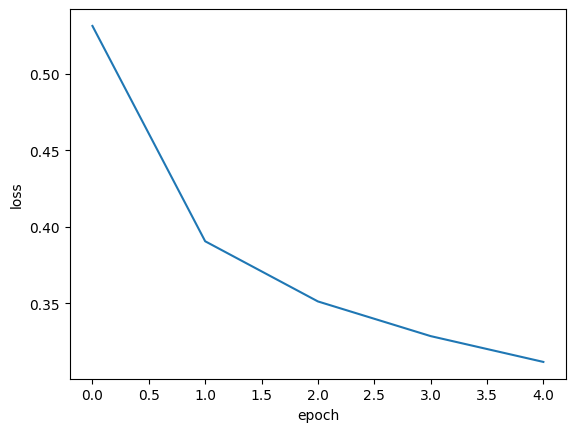

In [ ]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능하다
plt.plot(history.history['loss'])
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작한다. 5개의 에포크가 0~4까지 x축에 표현한다
plt.ylabel('loss')  # 손실된 값
plt.show()

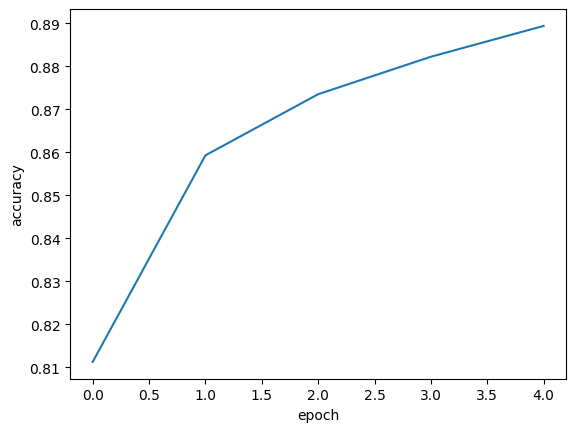

In [ ]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 결과 분석 : 에포크마다 손실이 감소하고 정확도가 향상함

In [ ]:
# 이번에는 에포크 횟수를 20번으로 늘려서 보자

model = model_fn()  # 위에서 만든 메서드로 모델 생성(3개층 입력, 은닉, 출력층)

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

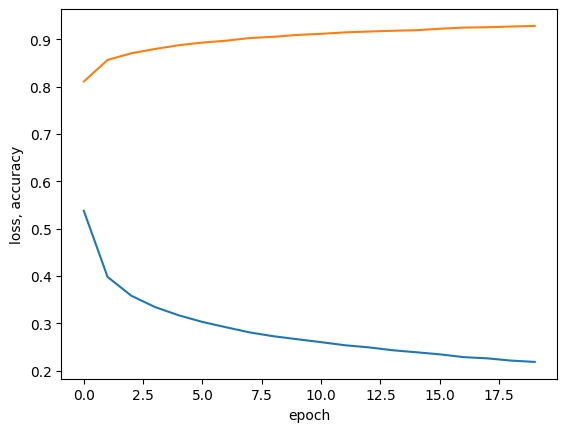

In [ ]:
plt.plot(history.history['loss']) # 손실율
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')  # 손실된 값, 정확도 값
plt.show()

In [ ]:
# 검증 손실
# 예전에 확률적 경사 하강법을 사용 했을 때 과대/ 과소 적합과 에포크 사이에 관계부분이 있었다
# 인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트 점수도 필요하다
# 그래서 위에처럼 훈련세트와 손실만 그리면 파악이 어렵다
# 검증손실을 이용해서 과대/과소 적합을 응용하겠다

# keypoint
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 모델이 잘 훈련 되었는지 판단하려면 정확도 보다는 손실함수 값을 확인하는 것이 더 좋은 방법이다

In [ ]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=2,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8113 - loss: 0.5341 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8567 - loss: 0.3941 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8717 - loss: 0.3548 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8796 - loss: 0.3320 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8871 - loss: 0.3164 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 - 5s - 4ms/step - accuracy: 0.8936 - loss: 0.3036 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8964 - loss: 0.2920 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 - 5s - 3ms/step - accuracy: 0.9006 - loss: 0.2829 - val_accuracy: 0.8606 - val_loss: 0.4369
Epoch 9/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9042 - loss: 0.2720 - val_accuracy: 0.8580 - 

In [ ]:
print(history.history.keys())
# 정확도accracy, 손실loss 값이 있다
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나온다

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


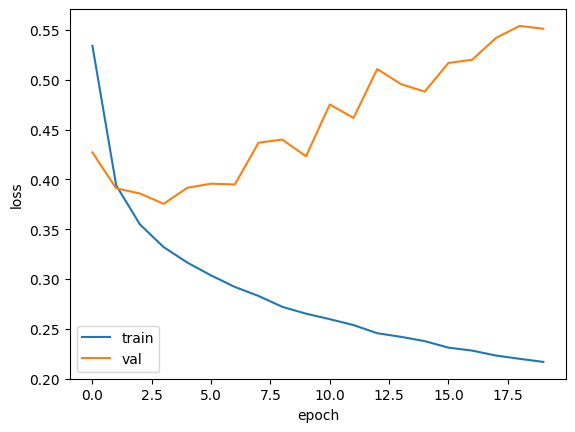

In [ ]:
# 과대/ 과소 적합문제를 조사하기 위해서 훈련손실, 검증손실을 한 그래프에 그려서 비교해보자
plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 결과 분석 : 초기에는 검증손실이 감소하다가 다섯번 째 에포크만에 다시 상승한다.
# 훈련 손실은 꾸준히 감소하기 때문에 과대적합모델이 만들어진다.
# 검증손실이 상승하는 시점을 가능한 낮추면 세트에 대한 손실이 줄어들고
# 검증세트에 대한 정확도가 증가할 것 같다

# 과대 적합을 막기 위한 방법으로 예전에 사용했던 규제방식 대신에
# 신경망에 특화된 규제방법(드롭아웃)을 나중에 사용해보자

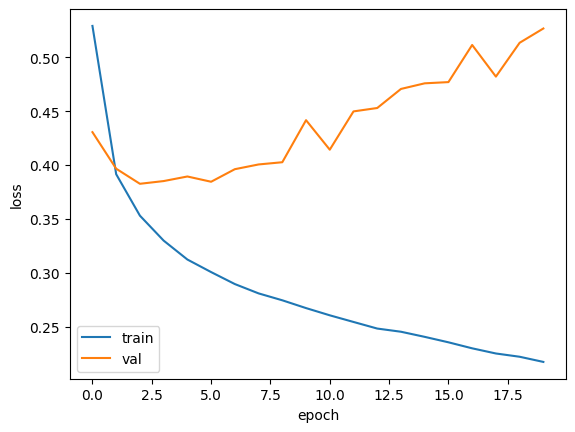

In [ ]:
# 지금은 옵티마이져 하이퍼파라미터를 조절하여 과대적합을 완화시켜본다
# RMSprop 옵티마이져는 많은 문제여서 잘 작동한다 -> 다른방법으로는 Adam이 있다
model = model_fn()

model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

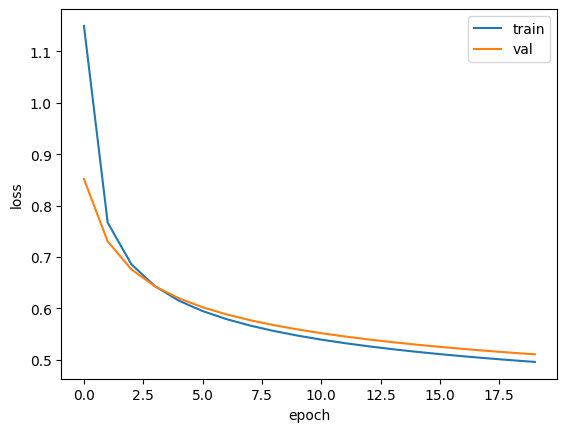

In [ ]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

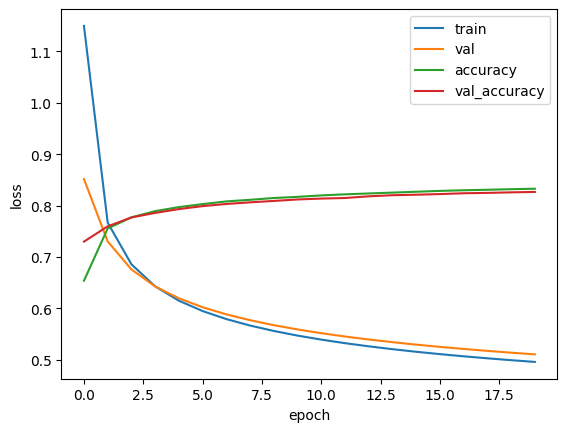

In [ ]:
plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.plot(history.history['accuracy']) # 훈련 정확도
plt.plot(history.history['val_accuracy']) # 검증 정확도
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val','accuracy','val_accuracy'])
plt.show()

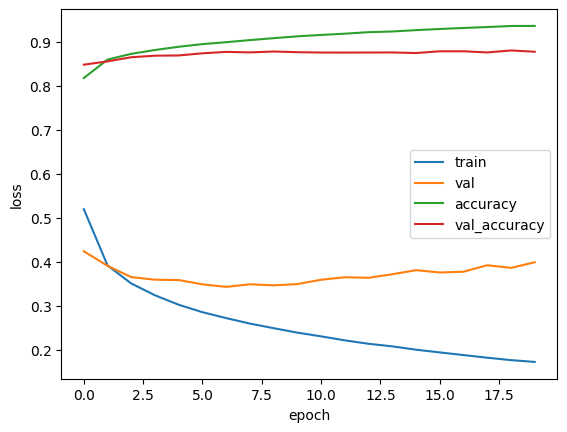

In [ ]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.plot(history.history['accuracy']) # 훈련 정확도
plt.plot(history.history['val_accuracy']) # 검증 정확도
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val','accuracy','val_accuracy'])
plt.show()

In [ ]:
# 드롭아웃(Dropout)은 딥러닝의 기초가 되는 제프리 힌턴이 소개 하였다
# 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대적합을 막는다

# 어던 샘플을 처리 할 때 은닉층의 두번째 뉴런이 드롭아웃이 되어 h2 출력이 없다
# 다른 샘플을 처리 할 때 은닉층의 첫번째 뉴런이 드롭아웃이 되어 h1 출력이 없다
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은뉴런을 드롭할지 우리가 하이퍼파라미터를 정할 것이다

# 드롭아웃이 왜 과대적합을 막을 수 있는지 생각해보면 이전층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다
# 일부 뉴련의 출력이 없다는 것을 감안하면 이 신경망은 더 안정적인 에측을 만들 수 있다는 것이다

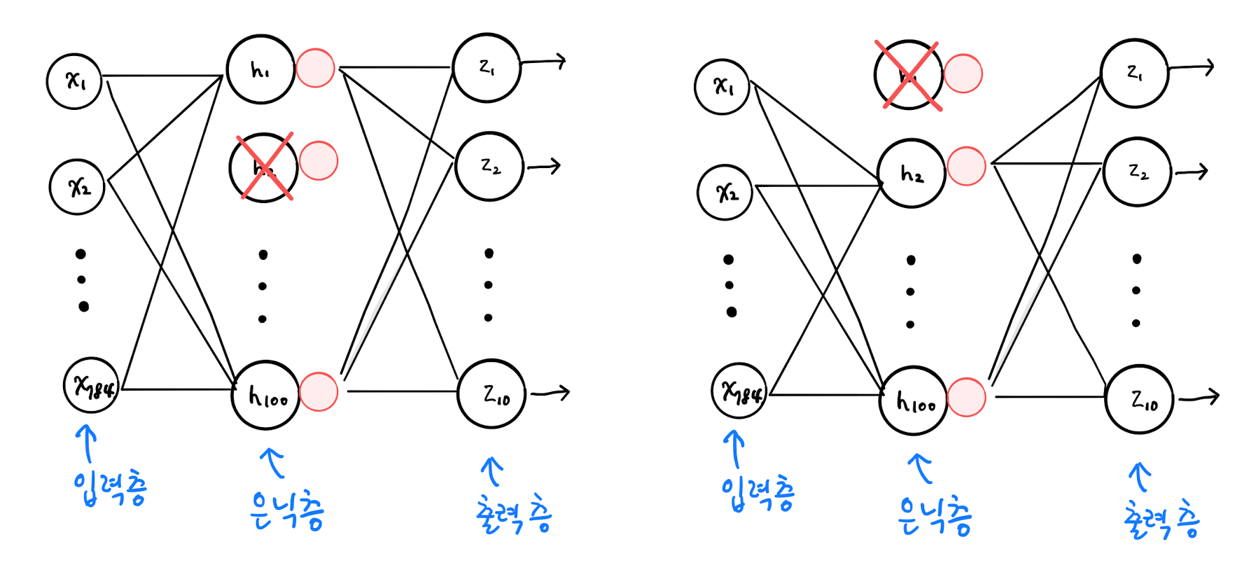

In [ ]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 한다
# 앙상블 : 다 좋은 예측을 만들기 위해 여러개의 모델을 3훈련하는 머신러닝 알고리즘이다
# 과대적합을 막아주는 좋은 기법이다

# 케라스에서 드롭아웃을 keras.layers.Dropout으로 제공한다
# 어떤층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만든다
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없다

# model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가한다
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭아웃

model.summary() # 요약 확인
# 은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없다
# 입력과 출력의 크기가 같다
# 일부 뉴런의 출력을 0으로 만들지만 전체출력 배열의 크기를 바꾸지는 않는다

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

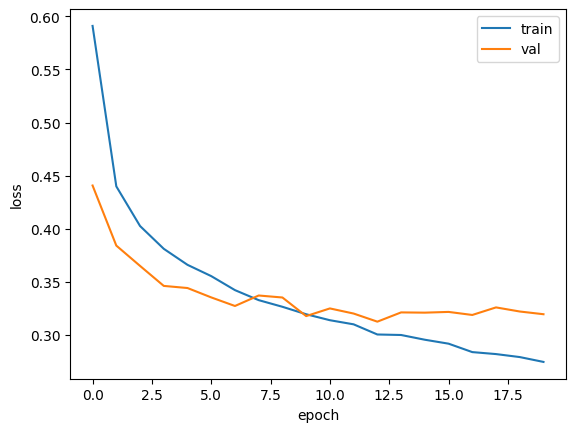

In [ ]:
# 주의사항 : 훈련이 끝난 뒤 평가나 에측을 수행할 때는 드롭아웃이 적용되지 않는다
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행된다
# 텐서플로우와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용시키지 않는다

# 훈련손실과 검증손실의 그래프를 그려보자
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

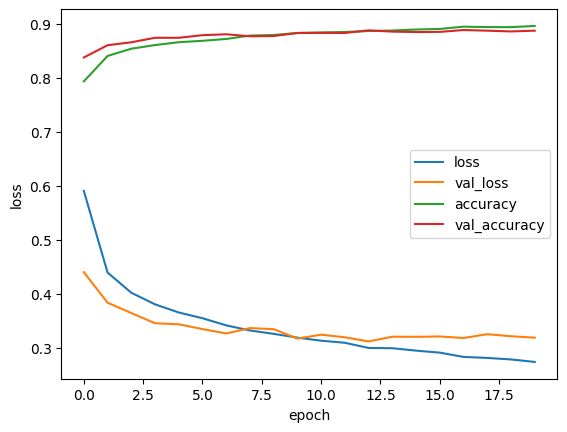

In [ ]:
plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.plot(history.history['accuracy']) # 훈련 정확도
plt.plot(history.history['val_accuracy']) # 검증 정확도
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()
# 과대 적합이 확실히 줄어 들었다
# 10번째 에포크가 검증손실의 감소가 멈추지만 크게 상승하진 않았다
# 20버느이 에포크가 실핼되어서 결국 과대적합이 되었다 -> 10번만 돌려보자

In [ ]:
# 차후에 재활용하기 위해서 모델 저장과 복원도를 구해본다
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole.keras') # 모델저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 매서드가 있다.
# 텐서플로우의 체크 포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장한다. https://geunuk.tistory.com/466

In [ ]:
model.save_weights('model.weights.h5')  # HDF5 형식으로도 저장됨(폴더에서 확인 할 수 있다)

In [ ]:
# 이제는 저장한 모델을 불러와 테스트를 진행해본다
!ls -al model*

-rw-r--r-- 1 root root 971928 Jan 10 05:51 model.weights.h5
-rw-r--r-- 1 root root 974765 Jan 10 05:47 model-whole.keras


In [ ]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model.weight.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다

# model_fn() 위와 동일한 모델
model =model_fn(keras.layers.Dropout(0.3)) #훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5')  # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 매서드는 save_weight()와 쌍을 이루는 laod_weight()매서드 이다
# 주의사항 : load_weight() 매서드를 사용하려면 save_weight()매서드로 저장했던 모델과
# 정확히 같은 구조를 가져야 한다

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델의 검증 정확도를 확인해보자
import numpy as np

# predict() 매서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환(다중분류)

# 패션 MNIST 데이터 셋에서 덜어낸 검증세트의 샘플 수는 12,000개 이기 때문에
# predict()메서드는 (12000,10) 크기의 배열을 반환
# 10개의 확률중 가장 큰 값의 인덱스를 골라(.argmax) 타겟 레이블과 비교하여 정확도를 계산해본다
val_labels= np.argmax(model.predict(val_scaled),axis=-1)

# axis=-1 배열의 마지막 차원을 따라 최대한 고름
# 검증세트는 2차원 배열이기 떄문에 마지막 차원은 1이 된다
# 예를 들어 아래 그림처럼 5x3 배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환 한다

# argmax() 매서드로 고른 인덱스(val_labels)와 타겟 (val_target)을 비교하여 같으면 1이 되고 다르면 0이 됨
# 이를 평균으로 출력해본다 (정확도)
print(np.mean(val_labels==val_target))  # 88.07점 평균
# axis =1 이면 열을 따라서 각 행의 최대값을 인덱스로 선택하고
# axis =0 이면 행을 따라서 각 열의 최대값을 인덱스로 선택한다
# 그 다음 아인은 argmax()로 고른 인덱스 (val_labels)와 타겟(val_target을 비교한다
# -> 두 배열에서 각 위치의 값이 같다면 1, 다르면 0 (평균하면 정확도가 된다)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.88075


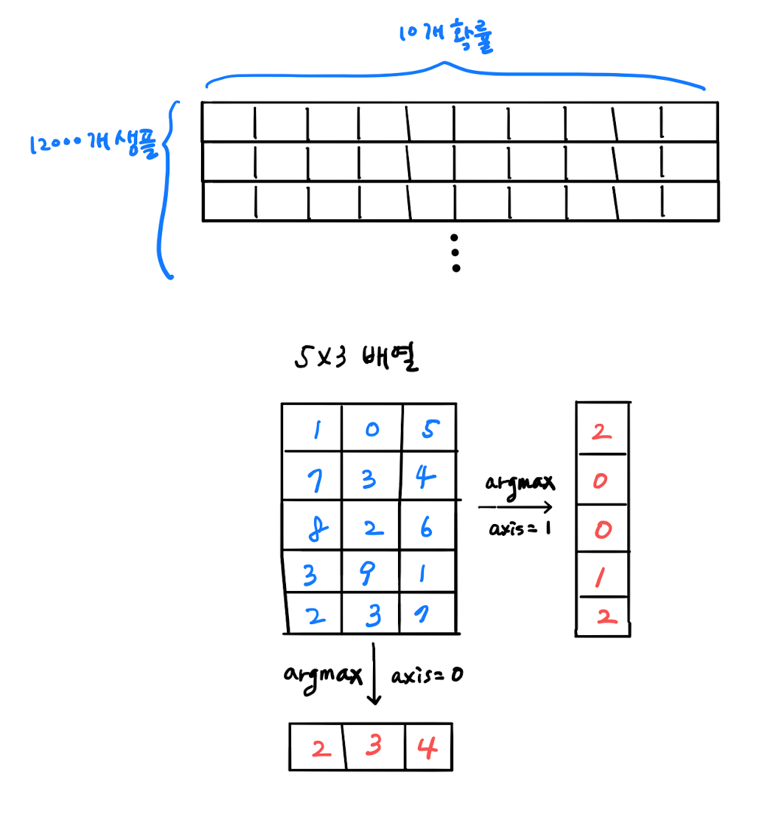

In [ ]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해본다
model = keras.models.load_model('model-whole.keras')  # load_model() 저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target)  # 같은 모델을 불러 들였기 때문에 위와 정확도가 같다
# 현 상태 분석: 20번의 에포크동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해보자 -> 케라스 롤백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.3263


[0.3285037875175476, 0.8807500004768372]

In [ ]:
# 실험 2
# 아예 파일로 새로운 모델을 만들고 바로 사용하는 방법
# 추가적으로 callback(콜백)이라는 것을 활용해보자
# 콜백 : 훈련과정 중간에 어떤작업을 수행 할 수 있게 하는 객체, keras.callabck 패키지에 있다
# fit() 매서드의 callback 매개변수에 리스트로 전달하여 사용한다
# 지금 우리가 사용할 콜백은 Modelcheckpoint 콜백으로 에포크마다 모델을 저장한다
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# 모댈 훈련후 best-model.keras에 최상의 검증점수를 낸 모델이 저장된다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = keras.models.load_model('best-model.keras')
# load_model로 저장했던 값을 불러와 다시 예측실행

model.evaluate(val_scaled,val_target)
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었다
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없다
# 이때 훈련을 종료하면 자원가 시간을 아낄 수 있다 -> 조기종료(early stopping)
# 조기종료는 딥러닝분야에 많이 사용하는 기법이다
# 에포크 횟수를 제한하는 역활이지만 모델이 과대적함 되는것을 막아주기도 함 -> 규제방법중 하나

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3189


[0.32306918501853943, 0.8843333125114441]

In [ ]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증점수가 향상되지 않더라도 참을 에포크 회수로 지정한다
# patience=2 2번연속 검증점수가 향상되지 않으면 훈련을 중지 한다(patience:인내심)
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌린다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

# 가장낮은 검증손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지 할 수 있음
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 돌림
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(early_stopping_cb.stopped_epoch)  # 조기 종료 시점 에포크

9


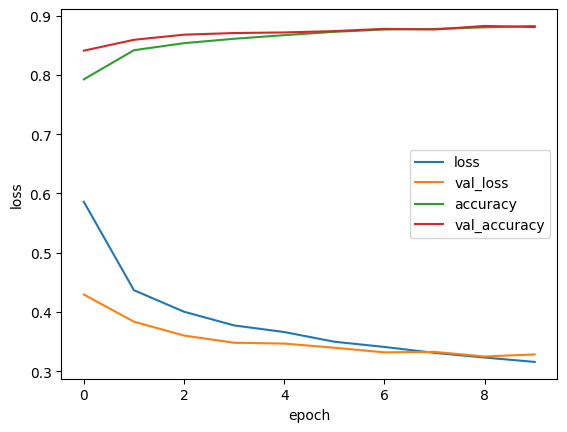

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8831 - loss: 0.3275


[0.331053763628006, 0.8799166679382324]

In [ ]:
plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.plot(history.history['accuracy']) # 훈련 정확도
plt.plot(history.history['val_accuracy']) # 검증 정확도
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

model.evaluate(val_scaled, val_target)  # 검증세트의 성능 확인 (33.10% , 87.99%) 에포크 9번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함께 사용하면 최상의 모델의 모델을 자동으로 저장해 준다는 것을 명심할 것